In [47]:
# Import other modules not related to PySpark
import os
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import math
from IPython.core.interactiveshell import InteractiveShell
from datetime import *
import statistics as stats
# This helps auto print out the items without explixitly using 'print'
InteractiveShell.ast_node_interactivity = "all" 
%matplotlib inline

In [48]:
# Import PySpark related modules
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit, desc, col, size, array_contains\
, isnan, udf, hour, array_min, array_max, countDistinct
from pyspark.sql.types import *

MAX_MEMORY = '15G'
# Initialize a spark session.
conf = pyspark.SparkConf().setMaster("local[*]") \
        .set('spark.executor.heartbeatInterval', 10000) \
        .set('spark.network.timeout', 10000) \
        .set("spark.core.connection.ack.wait.timeout", "3600") \
        .set("spark.executor.memory", MAX_MEMORY) \
        .set("spark.driver.memory", MAX_MEMORY)
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("Pyspark guide") \
        .config(conf=conf) \
        .getOrCreate()
    return spark

spark = init_spark()
# Укажите путь к CSV файлу
csv_file_path = "archive/1.csv"

# Прочитайте CSV файл в DataFrame
df = spark.read.csv(csv_file_path, header=True, sep=';', inferSchema=True)

col = ['timestamp','site_id','period_id','actual_consumption','actual_pv', 
       'load_00', 'load_01', 'load_02', 'load_03', 'load_04', 'load_05', 'load_06', 'load_07', 'load_08', 'load_09',
       'pv_00', 'pv_01', 'pv_02', 'pv_03', 'pv_04', 'pv_05', 'pv_06', 'pv_07', 'pv_08', 'pv_09']

df = df[col]

# Конвертируйте DataFrame из PySpark в DataFrame в pandas
df_pandas = df.toPandas()

# Теперь df_pandas содержит данные в формате pandas
df_pandas

,timestamp,site_id,period_id,actual_consumption,actual_pv,load_00,load_01,load_02,load_03,load_04,...,pv_00,pv_01,pv_02,pv_03,pv_04,pv_05,pv_06,pv_07,pv_08,pv_09
0,2014-07-19 18:45:00,1,0,51.625703,22.712489,52.816828,53.501688,54.079161,52.683472,52.590445,...,18.321836,13.912749,10.946568,9.243136,6.962653,5.466993,4.565274,4.082976,3.851306,3.638564
1,2014-07-19 19:30:00,1,0,52.281257,6.618605,51.452796,51.676287,51.329882,51.690879,51.538671,...,6.339899,4.295642,3.016987,2.314616,2.015446,1.952004,1.893801,1.840635,1.791986,1.747604
2,2014-07-19 20:00:00,1,0,50.719565,1.452209,51.313898,52.199835,52.340547,51.844138,52.661063,...,0.936193,0.403129,0.259490,0.338924,0.411971,0.479376,0.541489,0.598855,0.651823,0.700478
3,2014-07-19 20:15:00,1,0,51.901162,0.580877,51.950475,51.624345,50.867434,51.538997,51.331161,...,0.219761,0.091042,0.184182,0.269820,0.348792,0.421529,0.488656,0.550591,0.607483,0.659699
4,2014-07-19 21:00:00,1,0,51.250007,0.000000,52.218820,52.176852,51.745211,51.809854,51.835710,...,0.143507,0.232756,0.314935,0.390735,0.460637,0.524848,0.583788,0.637915,0.687616,0.733272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46961,2017-01-04 02:00:00,1,38,54.028347,0.000000,53.297704,58.212745,59.049011,59.687952,59.778460,...,-0.123926,-0.224769,-0.306827,-0.373601,-0.427937,-0.472152,-0.508131,-0.537409,-0.561232,-0.580619
46962,2017-01-04 02:15:00,1,38,53.684344,0.000000,57.647345,57.952364,58.294865,58.219958,58.270538,...,-0.123926,-0.224769,-0.306827,-0.373601,-0.427937,-0.472152,-0.508131,-0.537409,-0.561232,-0.580619
46963,2017-01-04 02:45:00,1,38,54.008991,0.000000,55.918118,56.717401,57.255785,57.786789,57.814119,...,-0.123926,-0.224769,-0.306827,-0.373601,-0.427937,-0.472152,-0.508131,-0.537409,-0.561232,-0.580619
46964,2017-01-04 03:15:00,1,38,54.214505,0.000000,55.875541,57.032992,57.409886,56.954600,57.884807,...,-0.123926,-0.224769,-0.306827,-0.373601,-0.427937,-0.472152,-0.508131,-0.537409,-0.561232,-0.580619


In [49]:
from pyspark.sql.functions import col, count

# Создаем список с количеством пустых значений в каждой колонке
empty_counts = [count(when(col(c).isNull() | (col(c) == ""), c)).alias("Empty_" + c) for c in df.columns]

# Создаем DataFrame с подсчетом пустых значений
missing_data = df.agg(*empty_counts)

# Преобразуем результат в список строк
result_rows = missing_data.first().asDict()

# Выводим результат в более читаемом формате
for column, count in result_rows.items():
    print(f"{column}: {count}")



Empty_timestamp: 0
Empty_site_id: 0
Empty_period_id: 0
Empty_actual_consumption: 0
Empty_actual_pv: 0
Empty_load_00: 0
Empty_load_01: 0
Empty_load_02: 0
Empty_load_03: 0
Empty_load_04: 0
Empty_load_05: 0
Empty_load_06: 0
Empty_load_07: 0
Empty_load_08: 0
Empty_load_09: 0
Empty_pv_00: 0
Empty_pv_01: 0
Empty_pv_02: 0
Empty_pv_03: 0
Empty_pv_04: 0
Empty_pv_05: 0
Empty_pv_06: 0
Empty_pv_07: 0
Empty_pv_08: 0
Empty_pv_09: 0


In [50]:
# Типы данных в данных
print('Columns overview')
pd.DataFrame(df.dtypes, columns = ['Column Name','Data type'])

Columns overview


,Column Name,Data type
0,timestamp,timestamp
1,site_id,int
2,period_id,int
3,actual_consumption,double
4,actual_pv,double
5,load_00,double
6,load_01,double
7,load_02,double
8,load_03,double
9,load_04,double


In [37]:
# Статистика по числовым признакам
df_to_describe = df

print("\nСтатистика по числовым признакам:")
df_to_describe.describe().toPandas().transpose()


Статистика по числовым признакам:


,0,1,2,3,4
summary,count,mean,stddev,min,max
site_id,46966,1.0,0.0,1,1
period_id,46966,24.481369501341398,18.85320996525833,0,58
actual_consumption,46966,68.74620117051941,17.21675714374579,11.154231639848081,186.51349133033932
actual_pv,46966,28.091334635789803,40.85255233086976,0.0,150.65349591249998
load_00,46966,68.74329955239376,17.11104018602714,25.510948650717744,144.38405389379315
load_01,46966,68.74177018579407,17.046100890256923,28.882502173183386,123.16514398332706
load_02,46966,68.74025220608682,17.02990958672048,30.76758595436617,127.02479012291525
load_03,46966,68.73907016694214,17.006835828895568,31.754338032005336,134.44110316308385
load_04,46966,68.73764332471886,17.011630376426726,32.52921192904976,136.48603610161177


In [52]:
# Корреляция между load_00 - load_09

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Выбираем только нужные колонки из датафрейма
selected_columns = ['load_00', 'load_01', 'load_02', 'load_03', 'load_04', 'load_05', 'load_06', 'load_07', 'load_08', 'load_09']
data_subset = df[selected_columns]

# Создайте список пар столбцов, для которых вы хотите вычислить корреляцию
column_pairs = [(col1, col2) for col1 in selected_columns for col2 in selected_columns]

# Вычислите корреляцию для каждой пары столбцов и создайте словарь с результатами
correlation_dict = {}
for col1, col2 in column_pairs:
    correlation = df.corr(col1, col2)
    correlation_dict[(col1, col2)] = correlation

# Выведите корреляцию для каждой пары столбцов
for (col1, col2), correlation in correlation_dict.items():
    print(f"Correlation between {col1} and {col2}: {correlation}")

Correlation between load_00 and load_00: 1.0
Correlation between load_00 and load_01: 0.9874863103070062
Correlation between load_00 and load_02: 0.9746857447806445
Correlation between load_00 and load_03: 0.9549328892787828
Correlation between load_00 and load_04: 0.9346045132641766
Correlation between load_00 and load_05: 0.9085351645350699
Correlation between load_00 and load_06: 0.8815020084455761
Correlation between load_00 and load_07: 0.8509065488706634
Correlation between load_00 and load_08: 0.820767954337449
Correlation between load_00 and load_09: 0.787984607004575
Correlation between load_01 and load_00: 0.9874863103070062
Correlation between load_01 and load_01: 1.0
Correlation between load_01 and load_02: 0.9875344084513866
Correlation between load_01 and load_03: 0.9756805729665659
Correlation between load_01 and load_04: 0.9555317218612929
Correlation between load_01 and load_05: 0.936186991727668
Correlation between load_01 and load_06: 0.9092462216561951
Correlation b

In [53]:
# Корреляция между pv_00 - pv_09

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Выбираем только нужные колонки из датафрейма
selected_columns = ['pv_00', 'pv_01', 'pv_02', 'pv_03', 'pv_04', 'pv_05', 'pv_06', 'pv_07', 'pv_08', 'pv_09']
data_subset = df[selected_columns]

# Создайте список пар столбцов, для которых вы хотите вычислить корреляцию
column_pairs = [(col1, col2) for col1 in selected_columns for col2 in selected_columns]

# Вычислите корреляцию для каждой пары столбцов и создайте словарь с результатами
correlation_dict = {}
for col1, col2 in column_pairs:
    correlation = df.corr(col1, col2)
    correlation_dict[(col1, col2)] = correlation

# Выведите корреляцию для каждой пары столбцов
for (col1, col2), correlation in correlation_dict.items():
    print(f"Correlation between {col1} and {col2}: {correlation}")

Correlation between pv_00 and pv_00: 1.0
Correlation between pv_00 and pv_01: 0.988510907439573
Correlation between pv_00 and pv_02: 0.9716790908583494
Correlation between pv_00 and pv_03: 0.9496130613728311
Correlation between pv_00 and pv_04: 0.9236669804136473
Correlation between pv_00 and pv_05: 0.8909206571151447
Correlation between pv_00 and pv_06: 0.8540117209046233
Correlation between pv_00 and pv_07: 0.8130049687713725
Correlation between pv_00 and pv_08: 0.7692648390160587
Correlation between pv_00 and pv_09: 0.721382549159418
Correlation between pv_01 and pv_00: 0.988510907439573
Correlation between pv_01 and pv_01: 1.0
Correlation between pv_01 and pv_02: 0.9898738186893485
Correlation between pv_01 and pv_03: 0.97355034560366
Correlation between pv_01 and pv_04: 0.952523498845825
Correlation between pv_01 and pv_05: 0.9266033358371903
Correlation between pv_01 and pv_06: 0.8938615714459716
Correlation between pv_01 and pv_07: 0.8565879993376838
Correlation between pv_01 an

<Axes: xlabel='actual_consumption', ylabel='Count'>

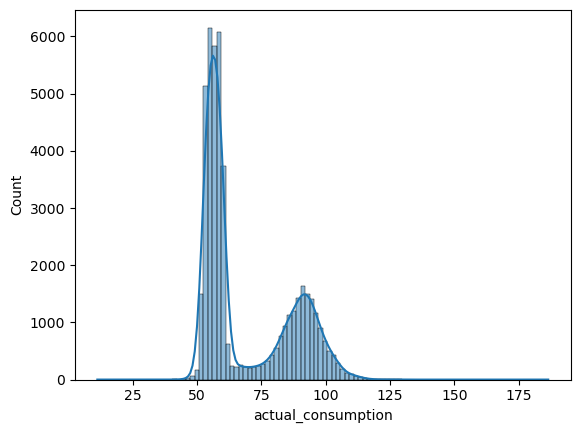

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразование PySpark DataFrame в Pandas DataFrame
pandas_df = df.toPandas()

# Создание гистограммы и KDE для признака 'actual_consumption' с использованием Pandas и Seaborn
sns.histplot(data=pandas_df, x='actual_consumption', kde=True)
plt.show()

<Axes: xlabel='actual_pv', ylabel='Count'>

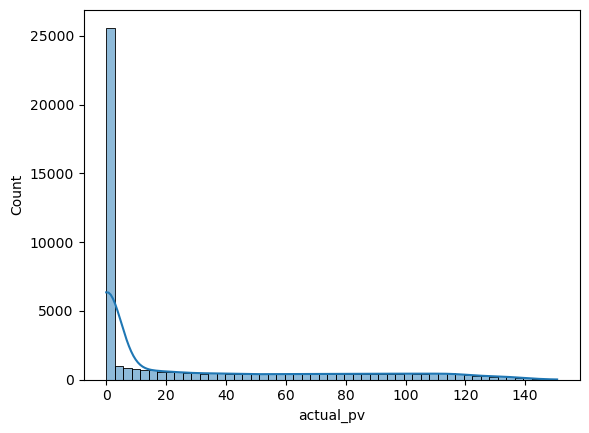

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Преобразование PySpark DataFrame в Pandas DataFrame
pandas_df = df.toPandas()

# Создание гистограммы и KDE для признака 'actual_consumption' с использованием Pandas и Seaborn
sns.histplot(data=pandas_df, x='actual_pv', kde=True)
plt.show()